In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda skill_listing: ast.literal_eval(skill_listing) if pd.notna(skill_listing) else skill_listing)

In [8]:
df_exploded = df.explode("job_skills").copy()

In [15]:
skill_count = df_exploded.groupby(["job_title_short", "job_skills"])["job_skills"].size()

skill_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Name: job_skills, Length: 2256, dtype: int64

In [18]:
df_skill_count = skill_count.reset_index(name="skill_count")

df_skill_count.sort_values("skill_count", ascending=False, inplace=True)

df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


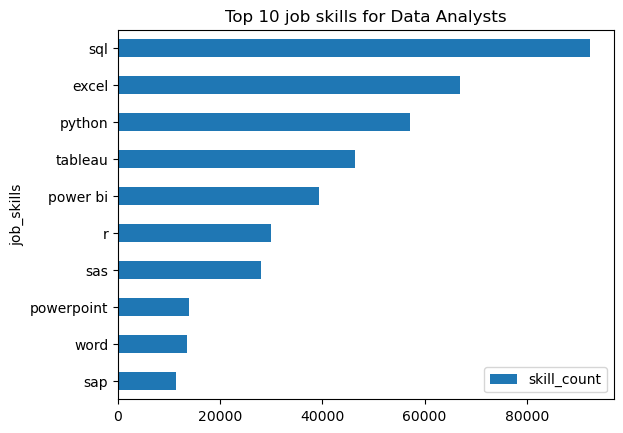

In [28]:
df_skill_plot = df_skill_count[df_skill_count["job_title_short"] == "Data Analyst"].head(10)



df_skill_plot.plot(kind="barh", x="job_skills", y="skill_count", title="Top 10 job skills for Data Analysts")
plt.gca().invert_yaxis()